<a href="https://colab.research.google.com/github/Edesak/tensorflow-kurz/blob/main/08_NLP_starting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod do NLP
NLP se zaměřuje na lidskou řeč a texty

In [ ]:
!nvidia-smi


Mon Sep  6 10:10:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Helper function

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-06 10:10:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-06 10:10:31 (83.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
import helper_functions as hf

##Ziskani text datasetu

Budeme pouzivat Kaggle introduction pro NLP

Disaster or not disaster
https://www.kaggle.com/c/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-09-06 10:10:34--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2021-09-06 10:10:34 (59.3 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
hf.unzip_data("/content/nlp_getting_started.zip")

##Vizualizace dat

In [ ]:
import pandas as pd 

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [ ]:
#Zamichat data

train_df_shuffled = train_df.sample(frac=1,random_state=42)

In [ ]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#Zkontrolovat balanc v datech
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
#Vizualizace nahodnych vysledku

import random
random_index = random.randint(0,len(train_df)-5)
#[v tomhle poli [tento seznam velicin nas zajma]]
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target = row
  print(f"Target: {target}", "(real disaster)" if target>0 else "(not disaster)")
  print(f"Text: \n {text}\n")
  print("----\n")

Target: 1 (real disaster)
Text: 
 Police Officer Wounded Suspect Dead After Exchanging Shots: Richmond police officer wounded suspect killed a... http://t.co/w0r8EAOKA0

----

Target: 0 (not disaster)
Text: 
 Don't be the cause of your own self destruction

----

Target: 1 (real disaster)
Text: 
 #hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/UMgD92wLjA #prebreak #best

----

Target: 1 (real disaster)
Text: 
 Cross-border terrorism: Pakistan caught red-handed again - The Times of India http://t.co/uiqsfgZoOx

----

Target: 1 (real disaster)
Text: 
 #News : The Latest: More Homes Razed by Northern California Wildfire - New York Times http://t.co/5kBRZZmf8c #TAFS #FB100%

----



###Split data training and validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentenc,val_sentenc,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                     train_df_shuffled["target"].to_numpy(),
                                                                     test_size = 0.1,
                                                                     random_state = 42)

In [ ]:
len(train_sentenc),len(train_labels)

(6851, 6851)

In [ ]:
len(val_sentenc),len(val_labels)

(762, 762)

In [ ]:
len(train_df_shuffled)

7613

In [ ]:
train_sentenc[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

##Conveting text to numbers

* **Tokenizace** - Nahrazeni jednolivych slov (pismen,slabiky, vet ,souveti atd.)za cisla 0,1,2,3,4,5 (Stane se velice rychle hodne velkym)
* **Embedding** - Kazde slovo (pismen,slabiky, vet, souveti atd.) se propmeni na vektor (muze byt vicerozmerny vektor)(Muze zmensit velikost + se muze ucit a menit vektory alias vztahy)

###Text vectorization (Tokenization)

In [ ]:
train_sentenc[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [ ]:
#ngram- kolik slov muzu spojit do jedne skupiny
text_vect = TextVectorization(max_tokens=None, #Kolik slov muze byt ve slovniku None = nekonecno
                              standardize= "lower_and_strip_punctuation", #lower case text a odstani znaky
                              split = "whitespace",
                              ngrams = None,
                              output_mode = 'int',#Jak mapovat slova
                              output_sequence_length = None, #Automaticky dorovna delku k nejdelsimu textu, ktery mame
                              pad_to_max_tokens = False 
                              )

In [ ]:
#Prumerne cislo tokenu 
round(sum([len(i.split()) for i in train_sentenc])/len(train_sentenc))

15

In [ ]:
max_vocb_length = 10000 #Max number of words in voc
max_length = 15 #Maximalni delka textu

text_vect = TextVectorization(max_tokens=max_vocb_length,
                              output_mode = 'int',
                              output_sequence_length = max_length)

In [ ]:
#Nasadit text vektorizaci na nas dataset
text_vect.adapt(train_sentenc)

In [ ]:
sample_sentence = "Je tu potopa v me ulici"
text_vect([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 7321,    1, 1241,   31,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
#Random veta z train datasetu
random_sentence = random.choice(train_sentenc)
print(f"Original text:\n{random_sentence}\n\n Vektorizovana veta: \n{text_vect([random_sentence])}")

Original text:
DISASTER AVERTED: Police kill gunman with 'hoax device' at cinema http://t.co/tdHn9zy0ER  via #Foxnews

 Vektorizovana veta: 
[[  75 3167   77  542 1402   14    1 5823   17 2524    1   49 1410    0
     0]]


In [ ]:
#Dostat unikatni slova v slovniku

words_in_vocb = text_vect.get_vocabulary()
top_5_words = words_in_vocb[:5]
bottom_5_words = words_in_vocb[-5:]

print(f"Pocet slov v slovniku {len(words_in_vocb)} \n pet nejcastejsich slov: {top_5_words} \n pet nejmene castych slov {bottom_5_words}")

Pocet slov v slovniku 10000 
 pet nejcastejsich slov: ['', '[UNK]', 'the', 'a', 'in'] 
 pet nejmene castych slov ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


###Vytvareni Embedding

In [ ]:
from tensorflow.keras import layers

In [ ]:
embedding = layers.Embedding(input_dim= max_vocb_length, #Velikost slovniku
                             output_dim = 128, #Velikost vektoru
                             input_length = max_length #Maximalni velikost vety
                             )

embedding

In [ ]:
random_sentence = random.choice(train_sentenc)

print(f"Original text:\n {random_sentence} \n Embedded:\n {embedding(text_vect([random_sentence]))}")

Original text:
 I'm so high moe I'm bouta crush this Friday's 
 Embedded:
 [[[ 0.02418647 -0.04301631  0.00343304 ...  0.02055531 -0.01673409
   -0.01220173]
  [ 0.00827692 -0.02591717 -0.03433062 ...  0.02705607  0.00731855
   -0.01000679]
  [ 0.0159183  -0.01944575  0.00050391 ...  0.01541132  0.03811295
    0.04270246]
  ...
  [ 0.00359917 -0.01765155 -0.02257822 ... -0.04915029  0.03719086
    0.00968391]
  [ 0.00359917 -0.01765155 -0.02257822 ... -0.04915029  0.03719086
    0.00968391]
  [ 0.00359917 -0.01765155 -0.02257822 ... -0.04915029  0.03719086
    0.00968391]]]


In [ ]:
sample_embed = embedding(text_vect([random_sentence]))

In [ ]:
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 2.41864659e-02, -4.30163145e-02,  3.43303755e-03,  2.94766314e-02,
        -9.04913992e-03,  2.56369263e-03, -4.73798290e-02,  2.27333643e-02,
         3.13805006e-02,  3.16787474e-02, -1.96215268e-02, -8.54329020e-03,
         1.76308639e-02, -2.96115633e-02,  2.41348483e-02, -7.24711269e-03,
        -4.16789427e-02,  1.94661729e-02, -4.54508662e-02, -2.84717325e-02,
         2.43301280e-02, -2.73675453e-02, -8.30069929e-03,  4.07530926e-02,
        -6.37444109e-03, -4.57192175e-02, -3.82971875e-02, -3.26339006e-02,
         1.11147873e-02,  3.60273607e-02,  2.23918818e-02,  4.17206995e-02,
        -3.58086824e-03,  3.23322900e-02, -3.15799937e-02,  1.59241222e-02,
         1.82162784e-02, -3.74715403e-03, -2.95227766e-03, -1.16056688e-02,
        -1.34697780e-02, -3.90793681e-02, -2.61754636e-02,  3.10023166e-02,
        -1.51704066e-02,  2.23587789e-02, -1.29814036e-02, -1.89059023e-02,
         1.18527561e-03,  1.87989734e-0

##Modeling 

* Model 0: Naive baseline R:(https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* Model 1: FF NN (Dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectinal-LSTM (RNN)
* Model 5: 1D-CNN
* Model 6: TF Hub Pretrained Feature Extraction
* Model 7: Same like Model 6 but 10% Data 

How? 

1. Create Model
2. Build Model
3. Fit Model
4. Evaluate


###Model 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
#Pipeline je stejny pricnip jako Sequentical v TF
model_0 = Pipeline([
                    
                    ("tfidf",TfidfVectorizer()), #convert slova na cisla
                    ("clf",MultinomialNB())
])

#Fit the pipline

model_0.fit(train_sentenc,train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
baseline_predicted = model_0.predict(val_sentenc)

In [ ]:
import numpy as np

In [ ]:
np.mean(baseline_predicted == val_labels)

0.7926509186351706

In [ ]:
from sklearn import metrics

In [ ]:
model_0_dict = metrics.classification_report(val_labels,baseline_predicted,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
print(metrics.classification_report(val_labels,baseline_predicted,target_names=["not disaster","disaster"],digits=6))

              precision    recall  f1-score   support

not disaster   0.748062  0.932367  0.830108       414
    disaster   0.886179  0.626437  0.734007       348

    accuracy                       0.792651       762
   macro avg   0.817120  0.779402  0.782057       762
weighted avg   0.811139  0.792651  0.786219       762



#### Accucary 79,27% F1-score 78,62%

macro avg - Kdyz mame nevybalancovany dataset zajma nas tato hodnota mnohem vice (Vice se obraci k minoritam F1class_1 + F1class_2 .... F1class_n)

weighted avg - Kdyz mame vybalancovany dataset vice se obraci k mjoritam (F1class_1*W1 + F1class_2*W2 .... F1class_n*Wn)

###Model 1

In [ ]:
val_data = np.column_stack((val_sentenc,val_labels))

In [ ]:
tuple(val_data[:10])

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        0], dtype=object),
 array(['FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        0], dtype=object),
 array(['Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        1], dtype=object),
 array(['@camilacabello97 Internally and externally screaming', 1],
       dtype=object),
 array(['Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
        1], dtype=object),
 array(['Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
        1], dtype=object),
 array(['How the West was burned: Thousands of wildfires ablaze in #California alone http://t.c

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy



inputs = layers.Input(shape=(1,),dtype=tf.string) #input is 1D 
x = text_vect(inputs)
x = embedding(x)
x = layers.GlobalMaxPool1D()(x) #feature vector zkombinuje x tokenu dohromady (spoji znalosti aby z toho vysla 1/0 predikce) Z 15,128 na 128 takze to 
outputs = Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs, name="model_1_dense")

model_1.compile(optimizer=Adam(),
                loss = binary_crossentropy,
                metrics = ["accuracy"])

history_model_1 = model_1.fit(train_sentenc,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentenc,val_labels),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard/","FF_Dense_1_GMP")])

Saving TensorBoard log files to: /content/Tensorboard//FF_Dense_1_GMP/20210906-101042
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.6363 - accuracy: 0.6441 - val_loss: 0.5749 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4702 - accuracy: 0.8229 - val_loss: 0.4722 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3416 - accuracy: 0.8765 - val_loss: 0.4504 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2588 - accuracy: 0.9088 - val_loss: 0.4493 - val_accuracy: 0.7966
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1989 - accuracy: 0.9345 - val_loss: 0.4623 - val_accuracy: 0.7992


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
probs_model_1 = model_1.predict(val_sentenc)

In [ ]:
probs_model_1[:10]

array([[0.44517693],
       [0.8312704 ],
       [0.9927043 ],
       [0.08247989],
       [0.23330803],
       [0.9516977 ],
       [0.90389836],
       [0.9818938 ],
       [0.9482193 ],
       [0.11614144]], dtype=float32)

In [ ]:
preds_model_1 = np.round(probs_model_1)

In [ ]:
preds_model_1[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
preds_model_1 = np.squeeze(preds_model_1)

In [ ]:
preds_model_1.shape

(762,)

In [ ]:
model_1_dict = metrics.classification_report(val_labels,preds_model_1,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
print(metrics.classification_report(val_labels,preds_model_1,target_names=["not_disater","disaster"],digits=6))

              precision    recall  f1-score   support

 not_disater   0.779443  0.879227  0.826334       414
    disaster   0.830508  0.704023  0.762053       348

    accuracy                       0.799213       762
   macro avg   0.804976  0.791625  0.794193       762
weighted avg   0.802764  0.799213  0.796977       762



####GAP - Accuracy 78,48% F1-score 78,20%


####GMP - Accuracy 78,22% F1-score 78,04%

##Vizualizace embeding

In [ ]:
words_in_vocb = text_vect.get_vocabulary()

In [ ]:
len(words_in_vocb)

10000

In [ ]:
words_in_vocb[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Wieght matrix of embeding layer

embed_w = model_1.get_layer(index=2).get_weights()[0]

In [ ]:
embed_w

array([[-0.0308639 , -0.1205338 , -0.02960314, ..., -0.04915029,
        -0.07261733, -0.0675621 ],
       [-0.03228842, -0.11821655, -0.03883681, ..., -0.03538572,
        -0.06739832, -0.06946448],
       [-0.04436251, -0.06427296, -0.03733629, ..., -0.03870256,
        -0.05165048, -0.06656344],
       ...,
       [ 0.02278667,  0.01611007, -0.00701606, ...,  0.02061745,
         0.01778391,  0.0487037 ],
       [ 0.01152672, -0.0265635 , -0.04469639, ...,  0.0909112 ,
        -0.04838764, -0.01115732],
       [ 0.0584654 , -0.04754974, -0.0439572 , ..., -0.03674266,
        -0.02855481, -0.0165    ]], dtype=float32)

In [ ]:
embed_w.shape

(10000, 128)

In [ ]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocb):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_w[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


In [ ]:
#Donwload files and upload to projector
"""
try: 
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass
"""

"\ntry: \n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass\n"

## Recurrent neural network (RNN)

Vysledek, ktery byl vyhodnoceny predtim ovlivnuje vysledek, ktery prichazi po nem. 

###Model 2: LSTM

LSTM - Long Short Term Memeroy (Jedena z popularnich vrstev)

Struktura 

```
Input (text) -> Tokenizace -> Embedding -> Layers (RNNs/dense) -> Output (Label probs)
```

In [ ]:
#Create LSTM Model

inputs = layers.Input(shape= (1,), dtype=tf.string)
x = text_vect(inputs)
x = embedding(x)
#print(x.shape)
x = layers.LSTM(64,return_sequences=True)(x) # Kdyz spojujeme RNN vrstvy musime vracet sequence (return_sequences=True)
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
x = layers.Dense(64,activation="relu")(x)
#print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
model_2.compile(optimizer=Adam(),
                loss=binary_crossentropy,
                metrics = ["accuracy"])


In [ ]:
history_model_2 = model_2.fit(train_sentenc,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentenc,val_labels),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard","model_2_LSTM_more_layers")])

Saving TensorBoard log files to: /content/Tensorboard/model_2_LSTM_more_layers/20210906-101056
Epoch 1/5
215/215 [==============================] - 10s 22ms/step - loss: 0.3741 - accuracy: 0.8380 - val_loss: 0.4531 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2387 - accuracy: 0.9051 - val_loss: 0.5257 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1726 - accuracy: 0.9329 - val_loss: 0.6137 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1356 - accuracy: 0.9529 - val_loss: 0.7112 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1056 - accuracy: 0.9590 - val_loss: 0.7037 - val_accuracy: 0.7677


In [ ]:
probs_model_2 = model_2.predict(val_sentenc)
probs_model_2[:10]

array([[0.10153452],
       [0.64522326],
       [0.99589914],
       [0.0337433 ],
       [0.01962635],
       [0.9936085 ],
       [0.87402403],
       [0.99873084],
       [0.9983954 ],
       [0.23143291]], dtype=float32)

In [ ]:
preds_model_2 = tf.round(probs_model_2)

In [ ]:
preds_model_2 = np.squeeze(preds_model_2)

In [ ]:
preds_model_2.shape

(762,)

In [ ]:
model_2_dict = metrics.classification_report(val_labels,preds_model_2,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
print(metrics.classification_report(val_labels,preds_model_2,target_names=["not_disaster","disaster"],digits=6))

              precision    recall  f1-score   support

not_disaster   0.754839  0.847826  0.798635       414
    disaster   0.787879  0.672414  0.725581       348

    accuracy                       0.767717       762
   macro avg   0.771359  0.760120  0.762108       762
weighted avg   0.769928  0.767717  0.765272       762



#### Accuracy 78,48% F1-score 78,23%




#### Accuracy 76,51% F1-score 76,30% (More layers) 

Overfitting

###Model 3: GRU

Dalsi z popularnich RNN vrstev (Gated recurrent unit)

GRU ma podobne vlastnosti jako LSTM, ale ma mene parametru

In [ ]:
inputs =  layers.Input(shape=(1,),dtype=tf.string)
x = text_vect(inputs)
x = embedding(x)
x = layers.GRU(64,return_sequences=True)(x) #Pokud chceme udelat vicero RNN layers musime vracet sequence
x = layers.LSTM(64,return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")


In [ ]:
model_3.compile(optimizer=Adam(),
                loss = binary_crossentropy,
                metrics = ["accuracy"])

In [ ]:
history_model_3 = model_3.fit(train_sentenc,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentenc,val_labels),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard","model_3_GRU_more_layers")])

Saving TensorBoard log files to: /content/Tensorboard/model_3_GRU_more_layers/20210906-101122
Epoch 1/5
215/215 [==============================] - 11s 29ms/step - loss: 0.1778 - accuracy: 0.9333 - val_loss: 0.6444 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1037 - accuracy: 0.9607 - val_loss: 0.7488 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0766 - accuracy: 0.9699 - val_loss: 0.8341 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0590 - accuracy: 0.9750 - val_loss: 1.1261 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0554 - accuracy: 0.9747 - val_loss: 1.1380 - val_accuracy: 0.7493


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 15, 64)            37248     
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 64)            33024     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                

In [ ]:
probs_model_3 = model_3.predict(val_sentenc)

In [ ]:
preds_model_3 = np.squeeze(np.round(probs_model_3))

In [ ]:
preds_model_3.shape

(762,)

In [ ]:
preds_model_3[:10]

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
model_3_dict = metrics.classification_report(val_labels,preds_model_3,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
print(metrics.classification_report(val_labels,preds_model_3,target_names=["nor_disaster","disaster"],digits=6))

              precision    recall  f1-score   support

nor_disaster   0.759907  0.787440  0.773428       414
    disaster   0.735736  0.704023  0.719530       348

    accuracy                       0.749344       762
   macro avg   0.747821  0.745731  0.746479       762
weighted avg   0.748868  0.749344  0.748813       762



#### Accuracy 75,98% F1-score 75,92%

#### Accuracy 77,43% F1-score 77,22% (More layers)

###Model 4: Bidirectional

Normalni RNN jde z leva do prava. 
Bidirectional RNN jdem v obou smerech
(V ramci sve vstvy mezi bunkami pokud se nenastavi jinak)

In [ ]:
inputs = layers.Input([1,],dtype=tf.string)
x = text_vect(inputs)
x = embedding(x)
x = layers.Bidirectional(layer = layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layer = layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs,outputs,name = "mode_4_bidirectional")

In [ ]:
model_4.summary()

Model: "mode_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,453,441
Trainable params: 1,453,441
Non-trainable params: 0
____________________________________

In [ ]:
model_4.compile(optimizer=Adam(),
                loss = binary_crossentropy,
                metrics = ["accuracy"])

In [ ]:
history_model_4 = model_4.fit(train_sentenc,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentenc,val_labels),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard","model_4_BiDir_LTSM_GRU")])

Saving TensorBoard log files to: /content/Tensorboard/model_4_BiDir_LTSM_GRU/20210906-101153
Epoch 1/5
215/215 [==============================] - 14s 36ms/step - loss: 0.1326 - accuracy: 0.9498 - val_loss: 0.8347 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0770 - accuracy: 0.9708 - val_loss: 0.9175 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0561 - accuracy: 0.9743 - val_loss: 1.5315 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0493 - accuracy: 0.9775 - val_loss: 1.6187 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0470 - accuracy: 0.9783 - val_loss: 1.3162 - val_accuracy: 0.7743


In [ ]:
probs_model_4 = model_4.predict(val_sentenc)

In [ ]:
preds_model_4 = np.squeeze(np.round(probs_model_4))

In [ ]:
preds_model_4.shape

(762,)

In [ ]:
preds_model_4 [:10]

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)

In [ ]:
model_4_dict = metrics.classification_report(val_labels,preds_model_4,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
print(metrics.classification_report(val_labels,preds_model_4,target_names=["not_disaster","disaster"],digits=6))

              precision    recall  f1-score   support

not_disaster   0.754202  0.867150  0.806742       414
    disaster   0.807692  0.663793  0.728707       348

    accuracy                       0.774278       762
   macro avg   0.780947  0.765471  0.767724       762
weighted avg   0.778630  0.774278  0.771104       762



#### Accuracy 75,46% F1-score 75,37%

#### Accuracy 75,22% F1-score 75,46% (GRU + LSTM)

###Model 5: CNN 1D (Convonutional network for text)

In [ ]:
embeding_test = embedding(text_vect(["Ahoj ja jsem Marek"]))
conv_1d = layers.Conv1D(32,
                        5, #Diva se na 5 slov zaroven a pak jde dal
                        activation = "relu",
                        padding = "same") #Default = valid output je mensi nez input default = same zustane vse stejne

conv_1d_output = conv_1d(embeding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embeding_test.shape, conv_1d_output.shape , max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
inputs = layers.Input((1,),dtype = tf.string)
x = text_vect(inputs)
x = embedding(x)
x = layers.Conv1D(64,5,activation="relu",padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs,outputs,name = "model_5_CNN_1D")


In [ ]:
model_5.summary()

Model: "model_5_CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [ ]:
model_5.compile(optimizer=Adam(),
                loss = binary_crossentropy,
                metrics = ["accuracy"])

In [ ]:
history_model_5 = model_5.fit(train_sentenc,
                              train_labels,
                              
                              epochs = 5,
                              validation_data = (val_sentenc,val_labels),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard","model_5_CNN1D_valid_kernel5")])

Saving TensorBoard log files to: /content/Tensorboard/model_5_CNN1D_valid_kernel5/20210906-101253
Epoch 1/5
215/215 [==============================] - 4s 11ms/step - loss: 0.1415 - accuracy: 0.9628 - val_loss: 0.8838 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0740 - accuracy: 0.9731 - val_loss: 0.9747 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0614 - accuracy: 0.9753 - val_loss: 1.1093 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0582 - accuracy: 0.9777 - val_loss: 1.1275 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0510 - accuracy: 0.9794 - val_loss: 1.1311 - val_accuracy: 0.7493


In [ ]:
probs_model_5 = model_5.predict(val_sentenc)

In [ ]:
preds_model_5 = np.squeeze(np.round(probs_model_5))

In [ ]:
model_5_dict = metrics.classification_report(val_labels,preds_model_5,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
print(metrics.classification_report(val_labels,preds_model_5,target_names=["not_disaster","disaster"],digits=6))

              precision    recall  f1-score   support

not_disaster   0.743982  0.821256  0.780712       414
    disaster   0.757377  0.663793  0.707504       348

    accuracy                       0.749344       762
   macro avg   0.750680  0.742525  0.744108       762
weighted avg   0.750100  0.749344  0.747278       762



#### Accuracy 75,72% F1-score 75,44% (Valid)

#### Accuracy 75,59% F1-score 75,41% (Same)

###Model 6: Transfer learning

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embed_samples = embed(["Moje jmeno je Marek"])

print(embed_samples[0][:50])

tf.Tensor(
[ 0.02380672 -0.00189186 -0.01870713 -0.06030954 -0.00207472 -0.02180161
  0.00019102 -0.04452875 -0.00917538  0.01174975  0.00332168  0.05360486
  0.00964403 -0.00140416 -0.00594744 -0.00292973 -0.00523766 -0.04959054
 -0.04432669 -0.03960432 -0.00830641 -0.03689043 -0.00646128 -0.01323607
  0.01086159 -0.00647521 -0.07403208 -0.07316075  0.02803315 -0.04059776
 -0.05661095 -0.04419718 -0.03627368  0.01013206 -0.0366     -0.00753093
 -0.07910799  0.06675235 -0.04129939 -0.06518956 -0.06397022 -0.04218522
  0.04093895 -0.02019812 -0.04391002  0.00674012 -0.03711587  0.04214706
  0.02459035  0.03086588], shape=(50,), dtype=float32)


In [ ]:
embed_samples.shape

TensorShape([1, 512])

In [ ]:
embed.trainable = False

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

In [ ]:
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64,activation="relu"),
                               layers.Dense(1,activation="sigmoid",name = "output_layer")
],name = "model_6_USE")

model_6.compile(optimizer=Adam(),
                loss = binary_crossentropy,
                metrics = ["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
#inputs = layers.Input((),dtype=tf.string)
#x = sentence_encoder_layer(inputs)
#outputs = layers.Dense(1,activation = "sigmoid")(inputs)

#model_6_test = tf.keras.Model(inputs,outputs,name="model_6_finetune")

In [ ]:
history_model_6 = model_6.fit(train_sentenc,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentenc,val_labels),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard","model_6_transferLearning")])

Saving TensorBoard log files to: /content/Tensorboard/model_6_transferLearning/20210906-104219
Epoch 1/5
215/215 [==============================] - 9s 39ms/step - loss: 0.5078 - accuracy: 0.7884 - val_loss: 0.4551 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4143 - accuracy: 0.8142 - val_loss: 0.4419 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4006 - accuracy: 0.8189 - val_loss: 0.4370 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3935 - accuracy: 0.8246 - val_loss: 0.4336 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3867 - accuracy: 0.8300 - val_loss: 0.4263 - val_accuracy: 0.8123


In [ ]:
probs_model_6 = model_6.predict(val_sentenc)

In [ ]:
preds_model_6 = np.squeeze(np.round(probs_model_6))

In [ ]:
model_6_dict = metrics.classification_report(val_labels,preds_model_6,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
print(metrics.classification_report(val_labels,preds_model_6,target_names=["not_disaster","disaster"],digits=6))

              precision    recall  f1-score   support

not_disaster   0.805869  0.862319  0.833139       414
    disaster   0.821317  0.752874  0.785607       348

    accuracy                       0.812336       762
   macro avg   0.813593  0.807596  0.809373       762
weighted avg   0.812924  0.812336  0.811431       762



#### Accuracy 81,23% F1-score 81,10%

###Model 7: Same as Model6 but smaller dataset

In [ ]:
#Create subset of 10% of data

train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
#SPATNE!!!!!!!!!!!!!
#Bereme data jak z training tak z validation datasetu
train_10_percent = train_df_shuffled[["text","target"]].sample(frac = 0.1,random_state = 16)
train_10_percent.head(), len(train_10_percent) , len(train_df_shuffled)

(                                                   text  target
 4257  @creationsbykole cork city in Ireland...we got...       1
 4771  Lightning strike in the distance via /r/pics h...       1
 7187  BUT I will be uploading these videos ASAP so y...       0
 4260  UAE cool to Mideast heat-wave; rain watch late...       1
 4754  Science Daily: Lightning reshapes rocks at the...       1, 761, 7613)

In [ ]:
#SPATNE!!!!!!!!!!!!!
#Bereme data jak z training tak z validation datasetu
train_10_percent_sentences = train_10_percent["text"].to_list()
train_10_percent_labels = train_10_percent["target"].to_list()
train_10_percent_labels[:10] , train_10_percent_sentences[:10]

([1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
 ['@creationsbykole cork city in Ireland...we got to 17 degrees today...that is a heat wave for us haha',
  'Lightning strike in the distance via /r/pics http://t.co/iDmhSwewQw #pics',
  'BUT I will be uploading these videos ASAP so you guys get to see the new weapon types in action!',
  'UAE cool to Mideast heat-wave; rain watch latest [video]\nNCMS issues warning of thundering rain poor visibility.... http://t.co/Tk65sKe0zm',
  "Science Daily: Lightning reshapes rocks at the atomic level - A lightning strike can reshape a mineral's crystal s... http://t.co/TEZLTqeyw2",
  '@CrimsonFuckingV @BitchL0veCannon Even you have to admit Seras that Sasha was a cute peice of ass. Then she exploded all over the sidewalk.',
  'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
  'Video:  Fire burns two apartment buildings and blows up car in Manchester http://t.co/5BGcw3EzB5',

In [ ]:
val_labels[:-1].shape

(761,)

In [ ]:
np.array(train_10_percent_labels).shape

(761,)

In [ ]:
np.array_equal(val_labels[:-1],np.array(train_10_percent_labels))

False

In [ ]:
len(train_10_percent_labels),len(train_10_percent_sentences)

(761, 761)

In [ ]:
train_10_percent["target"].value_counts()

0    441
1    320
Name: target, dtype: int64

In [ ]:
#Spravne rozdeleni dat (v prikladu vyse jsme brali val data i training data zaroven)
#Ted budeme brat 10% ciste z training dat
train_10_percent_split = int(0.1*len(train_sentenc))
train_10_percent_sentences = train_sentenc[:train_10_percent_split]
train_10_percent_labels = train_labels[:train_10_percent_split]

In [ ]:
#Neni to idealni ale staci to (rozlozeni 0 a 1 class)
pd.Series(np.array(train_10_percent_labels)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
model_7 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64,activation="relu"),
                               layers.Dense(1,activation="sigmoid")
])

model_7.compile(optimizer=Adam(),
                loss = binary_crossentropy,
                metrics = ["accuracy"])

history_model_7 = model_7.fit(train_10_percent_sentences,
                              train_10_percent_labels,
                              epochs = 5,
                              validation_data = (val_sentenc,val_labels),
                              callbacks = [hf.create_tensorboard_callback("/content/Tensorboard","model_7_10per_good_training")])

Saving TensorBoard log files to: /content/Tensorboard/model_7_10per_good_training/20210906-101404
Epoch 1/5
22/22 [==============================] - 7s 188ms/step - loss: 0.6664 - accuracy: 0.6803 - val_loss: 0.6465 - val_accuracy: 0.7152
Epoch 2/5
22/22 [==============================] - 1s 46ms/step - loss: 0.5969 - accuracy: 0.7927 - val_loss: 0.5897 - val_accuracy: 0.7559
Epoch 3/5
22/22 [==============================] - 1s 46ms/step - loss: 0.5237 - accuracy: 0.8219 - val_loss: 0.5366 - val_accuracy: 0.7795
Epoch 4/5
22/22 [==============================] - 1s 32ms/step - loss: 0.4635 - accuracy: 0.8307 - val_loss: 0.5048 - val_accuracy: 0.7848
Epoch 5/5
22/22 [==============================] - 1s 32ms/step - loss: 0.4241 - accuracy: 0.8380 - val_loss: 0.4902 - val_accuracy: 0.7808


In [ ]:
probs_model_7 = model_7.predict(val_sentenc)

In [ ]:
preds_model_7 = np.squeeze(np.round(probs_model_7))

In [ ]:
model_7_dict = metrics.classification_report(val_labels,preds_model_7,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
model_7_dict

{'accuracy': 0.7808398950131233,
 'disaster': {'f1-score': 0.7496251874062969,
  'precision': 0.7836990595611285,
  'recall': 0.7183908045977011,
  'support': 348},
 'macro avg': {'f1-score': 0.7773796882189011,
  'precision': 0.7812400489679232,
  'recall': 0.7758620689655172,
  'support': 762},
 'not_disaster': {'f1-score': 0.8051341890315054,
  'precision': 0.7787810383747178,
  'recall': 0.8333333333333334,
  'support': 414},
 'weighted avg': {'f1-score': 0.7797836213601502,
  'precision': 0.781027063798433,
  'recall': 0.7808398950131233,
  'support': 762}}

In [ ]:
print(metrics.classification_report(val_labels,preds_model_7,target_names=["not_disaster","disaster"],digits=6,output_dict=False))

              precision    recall  f1-score   support

not_disaster   0.778781  0.833333  0.805134       414
    disaster   0.783699  0.718391  0.749625       348

    accuracy                       0.780840       762
   macro avg   0.781240  0.775862  0.777380       762
weighted avg   0.781027  0.780840  0.779784       762



#### Accuracy 82,02% F1-score 82,02% (bad mixing)
Lepsi skore kvuli zamichani (zamichalo se zpet do stejneho poradi jako val labels)

#### Accuracy 78,35% F1-score 78,23% (good mix)

#### Accuracy 78,22% F1-score 78,05% (right split of data)

##Compare Results with Pandas

In [ ]:
model_0_dict.keys()

dict_keys(['not_disaster', 'disaster', 'accuracy', 'macro avg', 'weighted avg'])

In [ ]:
model_0_dict['weighted avg']

{'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'support': 762}

In [ ]:
data2 = model_0_dict['accuracy']
data = model_0_dict['weighted avg']
data, data2

({'f1-score': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'support': 762},
 0.7926509186351706)

In [ ]:
data['accuracy'] = data2

In [ ]:
data

{'accuracy': 0.7926509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'support': 762}

In [ ]:
model_0_dict['weighted avg']

{'accuracy': 0.7926509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'support': 762}

In [ ]:
model_0_dict['weighted avg']['accuracy'] = model_0_dict['accuracy']
model_1_dict['weighted avg']['accuracy'] = model_1_dict['accuracy']
model_2_dict['weighted avg']['accuracy'] = model_2_dict['accuracy']
model_3_dict['weighted avg']['accuracy'] = model_3_dict['accuracy']
model_4_dict['weighted avg']['accuracy'] = model_4_dict['accuracy']
model_5_dict['weighted avg']['accuracy'] = model_5_dict['accuracy']
model_6_dict['weighted avg']['accuracy'] = model_6_dict['accuracy']
model_7_dict['weighted avg']['accuracy'] = model_7_dict['accuracy']

In [ ]:
all_model_results = pd.DataFrame({"baseline":model_0_dict['weighted avg'],
                                  "model_1_dense":model_1_dict['weighted avg'],
                                  "model_2_LSTM":model_2_dict['weighted avg'],
                                  "model_3_GRU":model_3_dict['weighted avg'],
                                  "model_4_Bidir":model_4_dict['weighted avg'],
                                  "model_5_CNN_1D":model_5_dict['weighted avg'],
                                  "model_6_TF_Hub":model_6_dict['weighted avg'],
                                  "model_7_TF_Hub_10%":model_7_dict['weighted avg'],})
#all_model_results
all_model_results = all_model_results.transpose()
all_model_results.drop('support',inplace=True,axis=1)
all_model_results


,precision,recall,f1-score,accuracy
baseline,0.811139,0.792651,0.786219,0.792651
model_1_dense,0.802764,0.799213,0.796977,0.799213
model_2_LSTM,0.769928,0.767717,0.765272,0.767717
model_3_GRU,0.748868,0.749344,0.748813,0.749344
model_4_Bidir,0.778630,0.774278,0.771104,0.774278
model_5_CNN_1D,0.750100,0.749344,0.747278,0.749344
model_6_TF_Hub,0.812924,0.812336,0.811431,0.812336
model_7_TF_Hub_10%,0.781027,0.780840,0.779784,0.780840


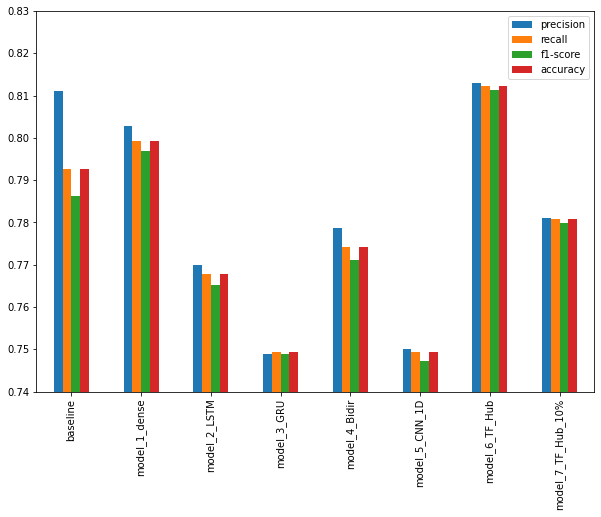

In [ ]:
#Plot model results

all_model_results.plot(kind = "bar",figsize = (10,7),ylim = (0.74,0.83)).legend(bbox_to_anchor = (1.0,1.0))

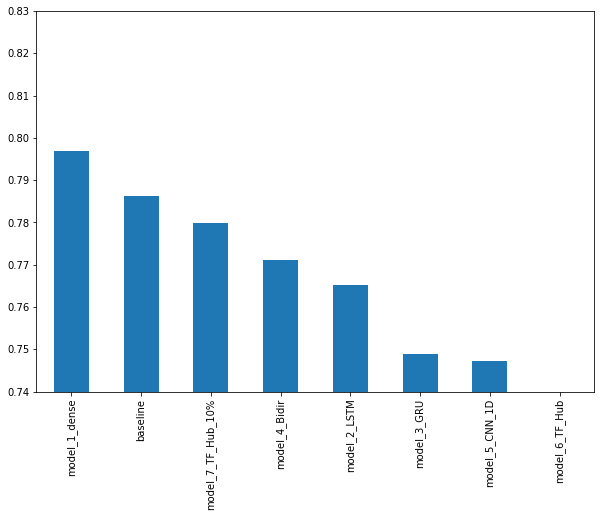

In [ ]:
all_model_results.sort_values("f1-score",ascending=False)['f1-score'].plot(kind = "bar",figsize = (10,7),ylim = (0.74,0.83))

##Upload Tensorboard

In [ ]:
!tensorboard dev upload --logdir "/content/Tensorboard"

2021-09-06 10:14:22.577692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-06 10:14:22.599900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-06 10:14:22.600537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/Tensorboard

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Pri

##Saving and loading model

Dva hlavni formaty HDF5 a tf format

In [ ]:
#Save to HDF5
model_6.save("model_6.h5")

In [ ]:
#Load HDF5
#Cokoliv co neni prirozene v tf musime nastavit custom object nebo vytvorit KerasLayer 
#Stejne jako u importu encoder layer z TF hub 
import tensorflow_hub as hub
loaded_model_6_h5 = tf.keras.models.load_model("/content/model_6.h5",
                                               custom_objects = {"KerasLayer":hub.KerasLayer})

In [ ]:
loaded_model_6_h5.evaluate(val_sentenc,val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.6929 - accuracy: 0.4895


[0.6928964853286743, 0.48950129747390747]

In [ ]:
all_model_results

,precision,recall,f1-score,accuracy
baseline,0.811139,0.792651,0.786219,0.792651
model_1_dense,0.802764,0.799213,0.796977,0.799213
model_2_LSTM,0.769928,0.767717,0.765272,0.767717
model_3_GRU,0.748868,0.749344,0.748813,0.749344
model_4_Bidir,0.778630,0.774278,0.771104,0.774278
model_5_CNN_1D,0.750100,0.749344,0.747278,0.749344
model_6_TF_Hub,0.482246,0.489501,0.483172,0.489501
model_7_TF_Hub_10%,0.781027,0.780840,0.779784,0.780840


In [ ]:
model_6.save("/content/Models/model_6")

INFO:tensorflow:Assets written to: /content/Models/model_6/assets


INFO:tensorflow:Assets written to: /content/Models/model_6/assets


In [ ]:
loaded_model_6_TF = tf.keras.models.load_model("/content/Models/model_6")

In [ ]:
loaded_model_6_TF.evaluate(val_sentenc,val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.6929 - accuracy: 0.4895


[0.6928964853286743, 0.48950129747390747]

##Najiti nejvice spatne pripady

In [ ]:
#Udelame Dataframe s validation vety a predikce nejlepsiho modelu
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip


--2021-09-06 10:27:56--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  34.1MB/s    in 15s     

2021-09-06 10:28:12 (59.9 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
!unzip "/content/08_model_6_USE_feature_extractor.zip"

Archive:  /content/08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [ ]:
model_6_github = tf.keras.models.load_model("/content/08_model_6_USE_feature_extractor")

In [ ]:
model_6_github.evaluate(val_sentenc,val_labels)

24/24 [==============================] - 1s 14ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
probs_model_6_github = model_6_github.predict(val_sentenc)

In [ ]:
preds_model_6_github = np.squeeze(np.round(probs_model_6_github))

In [ ]:
preds_model_6_github[:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)

In [ ]:
probs_model_6_github.shape

(762, 1)

In [ ]:
val_df = pd.DataFrame({"text":val_sentenc,
                       "target":val_labels,
                       "pred":preds_model_6_github,
                       "probs":np.squeeze(probs_model_6_github)})
val_df.head()

,text,target,pred,probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
#Najit spatne predikce a pak sortnout podle probs
most_wrong = val_df[val_df["target"]!= val_df["pred"]]

In [ ]:
most_wrong = most_wrong.sort_values("probs",ascending=False)
most_wrong.head() #False positive

,text,target,pred,probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213


In [ ]:
most_wrong.tail() #False Negative

,text,target,pred,probs
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


* 0 = not disaster
* 1 = disaster
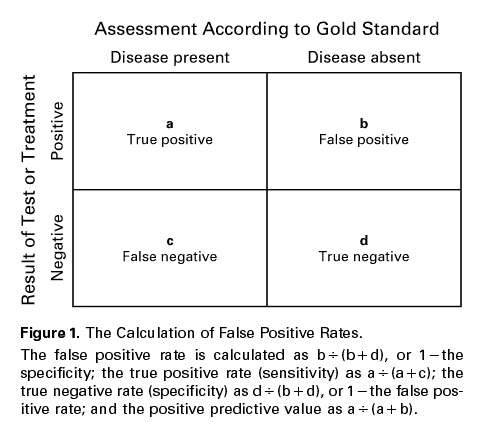

In [ ]:
#{'s' if abs(num_doors) != 1 else ''}
#False Positive
for row in most_wrong[:10].itertuples():
  _,text,target,pred,probs = row
  print(f"Target:{target}, Disaster: {'NO' if target == 0 else 'YES'}, Pred: {pred}, Pred Disaster: {'NO' if pred == 0 else 'YES'}, Prob: {probs}")
  print(f"\n Text: \n {text}\n")
  print("--------------------------\n")

Target:0, Disaster: NO, Pred: 1.0, Pred Disaster: YES, Prob: 0.9101957678794861

 Text: 
 ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

--------------------------

Target:0, Disaster: NO, Pred: 1.0, Pred Disaster: YES, Prob: 0.8769820928573608

 Text: 
 FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

--------------------------

Target:0, Disaster: NO, Pred: 1.0, Pred Disaster: YES, Prob: 0.8523000478744507

 Text: 
 @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

--------------------------

Target:0, Disaster: NO, Pred: 1.0, Pred Disaster: YES, Prob: 0.8354544043540955

 Text: 
 Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

--------------------------

Target:0, Disaster: NO, Pred: 1.0, Pred Disaster: YES, Prob: 0.82721346616745

 Text: 
 @AshGhebranious civil

In [ ]:
#False Negative
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,probs = row
  print(f"Target:{target}, Disaster: {'NO' if target == 0 else 'YES'}, Pred: {pred}, Pred Disaster: {'NO' if pred == 0 else 'YES'}, Prob: {probs}")
  print(f"\n Text: \n {text}\n")
  print("--------------------------\n")

Target:1, Disaster: YES, Pred: 0.0, Pred Disaster: NO, Prob: 0.06730344146490097

 Text: 
 @DavidVonderhaar At least you were sincere ??

--------------------------

Target:1, Disaster: YES, Pred: 0.0, Pred Disaster: NO, Prob: 0.05507579818367958

 Text: 
 @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

--------------------------

Target:1, Disaster: YES, Pred: 0.0, Pred Disaster: NO, Prob: 0.05460337549448013

 Text: 
 Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

--------------------------

Target:1, Disaster: YES, Pred: 0.0, Pred Disaster: NO, Prob: 0.054596975445747375

 Text: 
 going to redo my nails and watch behind the scenes of desolation of smaug ayyy

--------------------------

Target:1, Disaster: YES, Pred: 0.0, Pred Disaster: NO, Prob: 0.04963727295398712

 Text: 
 You can never escape me. Bullets don't harm me. Nothi

In [ ]:
test_sentenc = test_df["text"].to_list()
test_sentenc

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!',
 "No I don't like cold!",
 "NOOOOOOOOO! Don't do that!",
 "No don't tell me that!",
 'What if?!',
 'Awesome!',
 "Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU",
 '@sunkxssedharry will you wear shorts for race ablaze ?',
 '#PreviouslyOnDoyinTv: Toke Makinwa\x89Ûªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI',
 'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS 

In [ ]:

probs_test = model_6_github.predict(test_sentenc)

In [ ]:
preds_test = np.squeeze(np.round(probs_test))

In [ ]:
probs_test[:10], preds_test[:10]

(array([[0.51997   ],
        [0.87525123],
        [0.82783276],
        [0.9335067 ],
        [0.9679583 ],
        [0.55563426],
        [0.06342778],
        [0.04510275],
        [0.04864753],
        [0.06176266]], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32))

In [ ]:
test_preds_df = pd.DataFrame({"text": test_sentenc,
                              "pred": preds_test,
                              "probs":np.squeeze(probs_test)})
test_preds_df

,text,pred,probs
0,Just happened a terrible car crash,1.0,0.519970
1,"Heard about #earthquake is different cities, s...",1.0,0.875251
2,"there is a forest fire at spot pond, geese are...",1.0,0.827833
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.933507
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.967958
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1.0,0.800560
3259,Storm in RI worse than last hurricane. My city...,1.0,0.967862
3260,Green Line derailment in Chicago http://t.co/U...,1.0,0.915814
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,1.0,0.517644


In [ ]:
for row in test_preds_df.itertuples():
  _,text,pred,probs = row
  print(f"Pred: {pred}, Pred Disaster: {'NO' if pred == 0 else 'YES'}, Prob: {probs}")
  print(f"\n Text: \n {text}\n")
  print("--------------------------\n")

Streaming output truncated to the last 5000 lines.
Pred: 0.0, Pred Disaster: NO, Prob: 0.060460932552814484

 Text: 
 @sugayiffer SCREAMS UR SUCH A CUTE HANAYO

--------------------------

Pred: 0.0, Pred Disaster: NO, Prob: 0.08708014339208603

 Text: 
 @ShojoShit /SCREAMS

--------------------------

Pred: 0.0, Pred Disaster: NO, Prob: 0.14840660989284515

 Text: 
 Curvaceous LADY screams like a mad dog in a Nairobi Club See what happened (VIDEO) - #KOT Join Mature... http://t.co/1szi9X22cr

--------------------------

Pred: 0.0, Pred Disaster: NO, Prob: 0.11760607361793518

 Text: 
 *aggressively screams* https://t.co/8bHaejsUUt

--------------------------

Pred: 0.0, Pred Disaster: NO, Prob: 0.07748699188232422

 Text: 
 Oh no!  @ATPWorldTour is letting one of their players scream!  Turning @CitiOpen off. Can't listen to the screams

--------------------------

Pred: 0.0, Pred Disaster: NO, Prob: 0.08139869570732117

 Text: 
 @melodores @Hozier *SCREAMS*

--------------------------

##The speed/score rating


In [ ]:
model_6_dict

{'accuracy': 0.8123359580052494,
 'disaster': {'f1-score': 0.7856071964017991,
  'precision': 0.8213166144200627,
  'recall': 0.7528735632183908,
  'support': 348},
 'macro avg': {'f1-score': 0.8093730264389392,
  'precision': 0.8135928444560809,
  'recall': 0.8075962018990506,
  'support': 762},
 'not_disaster': {'f1-score': 0.8331388564760793,
  'precision': 0.8058690744920993,
  'recall': 0.8623188405797102,
  'support': 414},
 'weighted avg': {'f1-score': 0.8114314841586915,
  'precision': 0.8129238565064447,
  'recall': 0.8123359580052494,
  'support': 762}}

In [ ]:
model_0_dict

{'accuracy': 0.7926509186351706,
 'disaster': {'f1-score': 0.734006734006734,
  'precision': 0.8861788617886179,
  'recall': 0.6264367816091954,
  'support': 348},
 'macro avg': {'f1-score': 0.7820571304442272,
  'precision': 0.817120438646247,
  'recall': 0.7794019656838247,
  'support': 762},
 'not_disaster': {'f1-score': 0.8301075268817204,
  'precision': 0.748062015503876,
  'recall': 0.9323671497584541,
  'support': 414},
 'weighted avg': {'accuracy': 0.7926509186351706,
  'f1-score': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'support': 762}}

In [ ]:
import time

def pred_time (model,sample):

  start_time = time.perf_counter()
  model.predict(sample)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(sample)
  return total_time,time_per_pred

In [ ]:
model_6_total_time,model_6_time_per_pred = pred_time(model_6_github,val_sentenc)

model_6_total_time,model_6_time_per_pred 

(0.350669630000084, 0.00046019636482950657)

In [ ]:
model_0_total_time,model_0_time_per_pred = pred_time(model_0,val_sentenc)

model_0_total_time,model_0_time_per_pred

(0.02379840499997954, 3.123150262464506e-05)

In [ ]:
model_6_github_dict = metrics.classification_report(val_labels,preds_model_6_github,target_names=["not_disaster","disaster"],digits=6,output_dict=True)

In [ ]:
model_6_github_dict['weighted avg']['accuracy'] = model_6_github_dict['accuracy']

In [ ]:
model_0_dict["weighted avg"]["f1-score"]

0.7862189758049549

Text(0, 0.5, 'F1-Score')

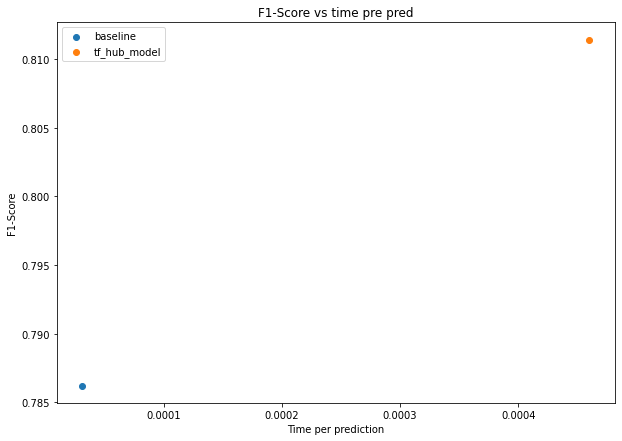

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.scatter(model_0_time_per_pred,model_0_dict["weighted avg"]["f1-score"],label = "baseline")
plt.scatter(model_6_time_per_pred,model_6_dict["weighted avg"]["f1-score"],label = "tf_hub_model")
plt.legend()
plt.title("F1-Score vs time pre pred")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score")